In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from growth.sweep.sweep import Sweep
%matplotlib inline

In [2]:
ls ../../../data/synthetic/sweeps/Sweep_181201_191516/

batches/     data.hdf     log/         scripts/
benchmark/   job.pkl      notes.txt    simulations/


In [3]:
sweep_path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(sweep_path)
sweep

1 x 16 sweep, 4 recombination generations

In [4]:
simulation = sweep[5]

In [5]:
image = simulation.generate_microscopy(ambiguity=0.3, rho=0.5, bleedthrough=0.5)

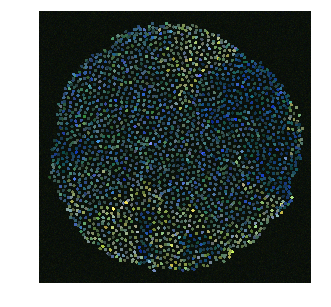

In [7]:
_ = image.render()

In [5]:
clonal_marker = image.measure(1)
control = image.measure(2)

NameError: name 'image' is not defined

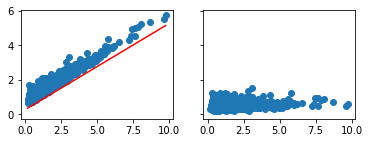

In [57]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(6, 2))
ax0.scatter(clonal_marker, control)

clonal_marker_bg = image.extract_background(1)
control_bg = image.extract_background(2)
glm = GLM(clonal_marker_bg, control_bg)
domain = np.linspace(clonal_marker.min(), clonal_marker.max(), 100)
ax0.plot(domain, glm.predict(domain), '-r')

ax1.scatter(clonal_marker, control-glm.predict(clonal_marker))

In [6]:
simulation

In [8]:
from clones.validation.simulation import SimulationBenchmark

NameError: name 'default_figure' is not defined

In [7]:
data = simulation.measure(.1)

In [9]:
benchmark = SimulationBenchmark(data)

KeyError: "['centroid_x' 'centroid_y'] not in index"